# Load bigfish detection results


In [1]:
import numpy as np
import pandas as pd
from copy import deepcopy
import matplotlib.pyplot as plt
from dask.array.image import imread as imr

import random

/tmp/ipykernel_10911/3879242227.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import bigfish.stack as stack
import bigfish.detection as detection
from buildReferenceSpot import buildReferenceSpotFromImages

In [3]:
def getImagesAndSpotList(sequenceCell, selectedThreshold, voxelRadius, objectRadius, sampling=10):
    images=[]    
    spots_list=[]
    MaxTimePoint = sequenceCell.shape[0]

    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxelRadius, 
        object_radius_nm=objectRadius, 
        ndim=3)

    for t in range(1,MaxTimePoint,sampling):
        rna = np.array(sequenceCell[t])
        images.append(rna)

        # LoG filter
        rna_log = stack.log_filter(rna, sigma=spot_radius_px)

        # local maximum detection
        mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

        # thresholding
#         threshold = detection.automated_threshold_setting(rna_log, mask)
        spots_, _ = detection.spots_thresholding(rna_log, mask, float(selectedThreshold))
        spots_list.append(spots_)
    n=len(images)
    print("Total number of images : "+str(n))
    return images, spots_list, n

In [4]:
def getSpot2D(spotCoor, mipSequenceCell, reference_spot):
    z = spotCoor[0]
    y = spotCoor[1]
    x = spotCoor[2]

    yu = mipSequenceCell.shape[0]
    xu = mipSequenceCell.shape[1]
    delz = reference_spot.shape[0]//2
    dely = reference_spot.shape[1]//2
    delx = reference_spot.shape[2]//2

    if (y-dely)<0:
        ymin=0
    else:
        ymin=y-dely
    if (y+dely+1)>yu:
        ymax=yu
    else:
        ymax=y+dely+1
    if (x-delx)<0:
        xmin=0
    else:
        xmin=x-delx
    if (x+delx+1)>xu:
        xmax=xu
    else:
        xmax=x+delx+1

    spotVol = np.array(mipSequenceCell[ymin:ymax,xmin:xmax])
    return spotVol

In [5]:
voxelRadius = (700, 110, 110) # in nanometers
objectRadius = (700, 105, 105) # in nanometers

In [6]:
homeFolder = '/media/raphael/data/works/20231220_C3_14_2h_ofON/bleach_correction/w_background/'
nameKey = 'C3.14_ON_01_w1SPI-488_s'

imsQ = '4'
cellNumber = '33'
nucleiStackForm = nameKey+imsQ+"_cell_"

pathToTimeSequenceFullView = homeFolder+nameKey+imsQ+'/*.tif'
cell_Crop_Folder = homeFolder+nameKey+imsQ+'/cell_'+str(cellNumber)+'/'
pathToTimeSequenceCell = homeFolder+nameKey+imsQ+'/cell_'+str(cellNumber)+'/*.tif'
moviePath = homeFolder+nameKey+imsQ

sequenceCell = imr(pathToTimeSequenceCell)
mipSequenceCell = np.max(sequenceCell, axis=1)
MaxTimePoint = sequenceCell.shape[0]

In [7]:
pathToTimeSequenceMask = homeFolder+nameKey+imsQ+'/mask_'+str(cellNumber)+'/*.tif'
mask = imr(pathToTimeSequenceMask)

mipSequenceMask= np.max(mask, axis=1)
mask.shape

(120, 36, 156, 161)

In [8]:
"""
To do 


Remove all spots from the tx regions


"""

'\nTo do \n\n\nRemove all spots from the tx regions\n\n\n'

### Perform spot detection for a handful of frames


In [9]:
selectedThreshold = int(input("Enter your selected threshold: "))

Enter your selected threshold: 85


In [10]:
# baseFolder = homeFolder+nameKey+imsQ
# thresholdFile.iloc[np.where(thresholdFile['cell']=='cell_'+str(cellNumber))]
# thresholdManual = int(thresholdFile.iloc[np.where(thresholdFile['cell']=='cell_'+str(cellNumber))]['threshold'])

In [11]:
thresholdManual=selectedThreshold

In [12]:
maxFrame = int(input("Enter your max Frame: "))

Enter your max Frame: 120


In [30]:
reorder=False
sampling=1
images=[]    
spots_list=[]
MaxTimePoint = sequenceCell.shape[0]
spotsFrame=[]
for t in range(0, maxFrame):
    print(t)
    rna = np.array(sequenceCell[t])
    if reorder:
        rna = reorderZstack(rna,4)
    rna_mip = stack.maximum_projection(rna)

    # spot radius
    spot_radius_px = detection.get_object_radius_pixel(
        voxel_size_nm=voxelRadius,#(600, 80, 80), 
        object_radius_nm=objectRadius, 
        ndim=3)

    # LoG filter
    rna_log = stack.log_filter(rna, sigma=spot_radius_px)

    # local maximum detection
    mask = detection.local_maximum_detection(rna_log, min_distance=spot_radius_px)

    # thresholding
    spots_current, _ = detection.spots_thresholding(rna_log, mask, float(thresholdManual))
    spotsFrame.append(spots_current)
    if t in np.arange(0,MaxTimePoint, sampling):
        print('saved')
        images.append(rna)
        spots_list.append(spots_current)
    

0
saved
1
saved
2
saved
3
saved
4
saved
5
saved
6
saved
7
saved
8
saved
9
saved
10
saved
11
saved
12
saved
13
saved
14
saved
15
saved
16
saved
17
saved
18
saved
19
saved
20
saved
21
saved
22
saved
23
saved
24
saved
25
saved
26
saved
27
saved
28
saved
29
saved
30
saved
31
saved
32
saved
33
saved
34
saved
35
saved
36
saved
37
saved
38
saved
39
saved
40
saved
41
saved
42
saved
43
saved
44
saved
45
saved
46
saved
47
saved
48
saved
49
saved
50
saved
51
saved
52
saved
53
saved
54
saved
55
saved
56
saved
57
saved
58
saved
59
saved
60
saved
61
saved
62
saved
63
saved
64
saved
65
saved
66
saved
67
saved
68
saved
69
saved
70
saved
71
saved
72
saved
73
saved
74
saved
75
saved
76
saved
77
saved
78
saved
79
saved
80
saved
81
saved
82
saved
83
saved
84
saved
85
saved
86
saved
87
saved
88
saved
89
saved
90
saved
91
saved
92
saved
93
saved
94
saved
95
saved
96
saved
97
saved
98
saved
99
saved
100
saved
101
saved
102
saved
103
saved
104
saved
105
saved
106
saved
107
saved
108
saved
109
saved
110
saved


## Get rid of spots outside the cell

In [14]:
from order_spot import *

In [15]:
spots_list = sort_spot_list_mask(spots_list,mipSequenceCell,mipSequenceMask,cellNumber)

eliminated spots : 300


In [43]:
spotsFrame = sort_spot_list_mask(spotsFrame,mipSequenceCell,mipSequenceMask,cellNumber)

eliminated spots : 300


In [22]:
def get_cells_type_list(img,labels,cellNumber):
    '''
    When given images and labels of shape (t,y,x) this function return the pixel value corresponding to a cell 
    '''
    res=[]
    img_cp=copy.deepcopy(img)
    img_cp=verify_array(img_cp)
    labels=verify_array(labels)

    
    for i in range(0,len(img)):
        label=labels[i]
        frame=img_cp[i]
        
        tmp_res = np.where(label!=cellNumber,0,frame )
        res.append(tmp_res)
        
    #res = np.array(res)
    return res 


In [ ]:
def get_cells_from_3D_stack_v2(stacks,labels,cellNumber):
    '''
    When given stacks of shape (t,z,y,x) and labels of shape (t,y,x) this function return the pixel value corresponding to a cell 
    '''
    res=[]
    img_cp=verify_array(stacks)
    labels=verify_array(labels)

    res = np.where(labels!=cellNumber,0,img_cp)
    #print("Done for cell ", cellNumber)
    return res 


In [27]:
mipSequenceCell = get_cells_type_list(mipSequenceCell,mipSequenceMask,int(cellNumber))

In [40]:
images = get_cells_type_list(images,mipSequenceMask,int(cellNumber))

image list found!
Found 1568
Found 1568 spots, max intensity = 292


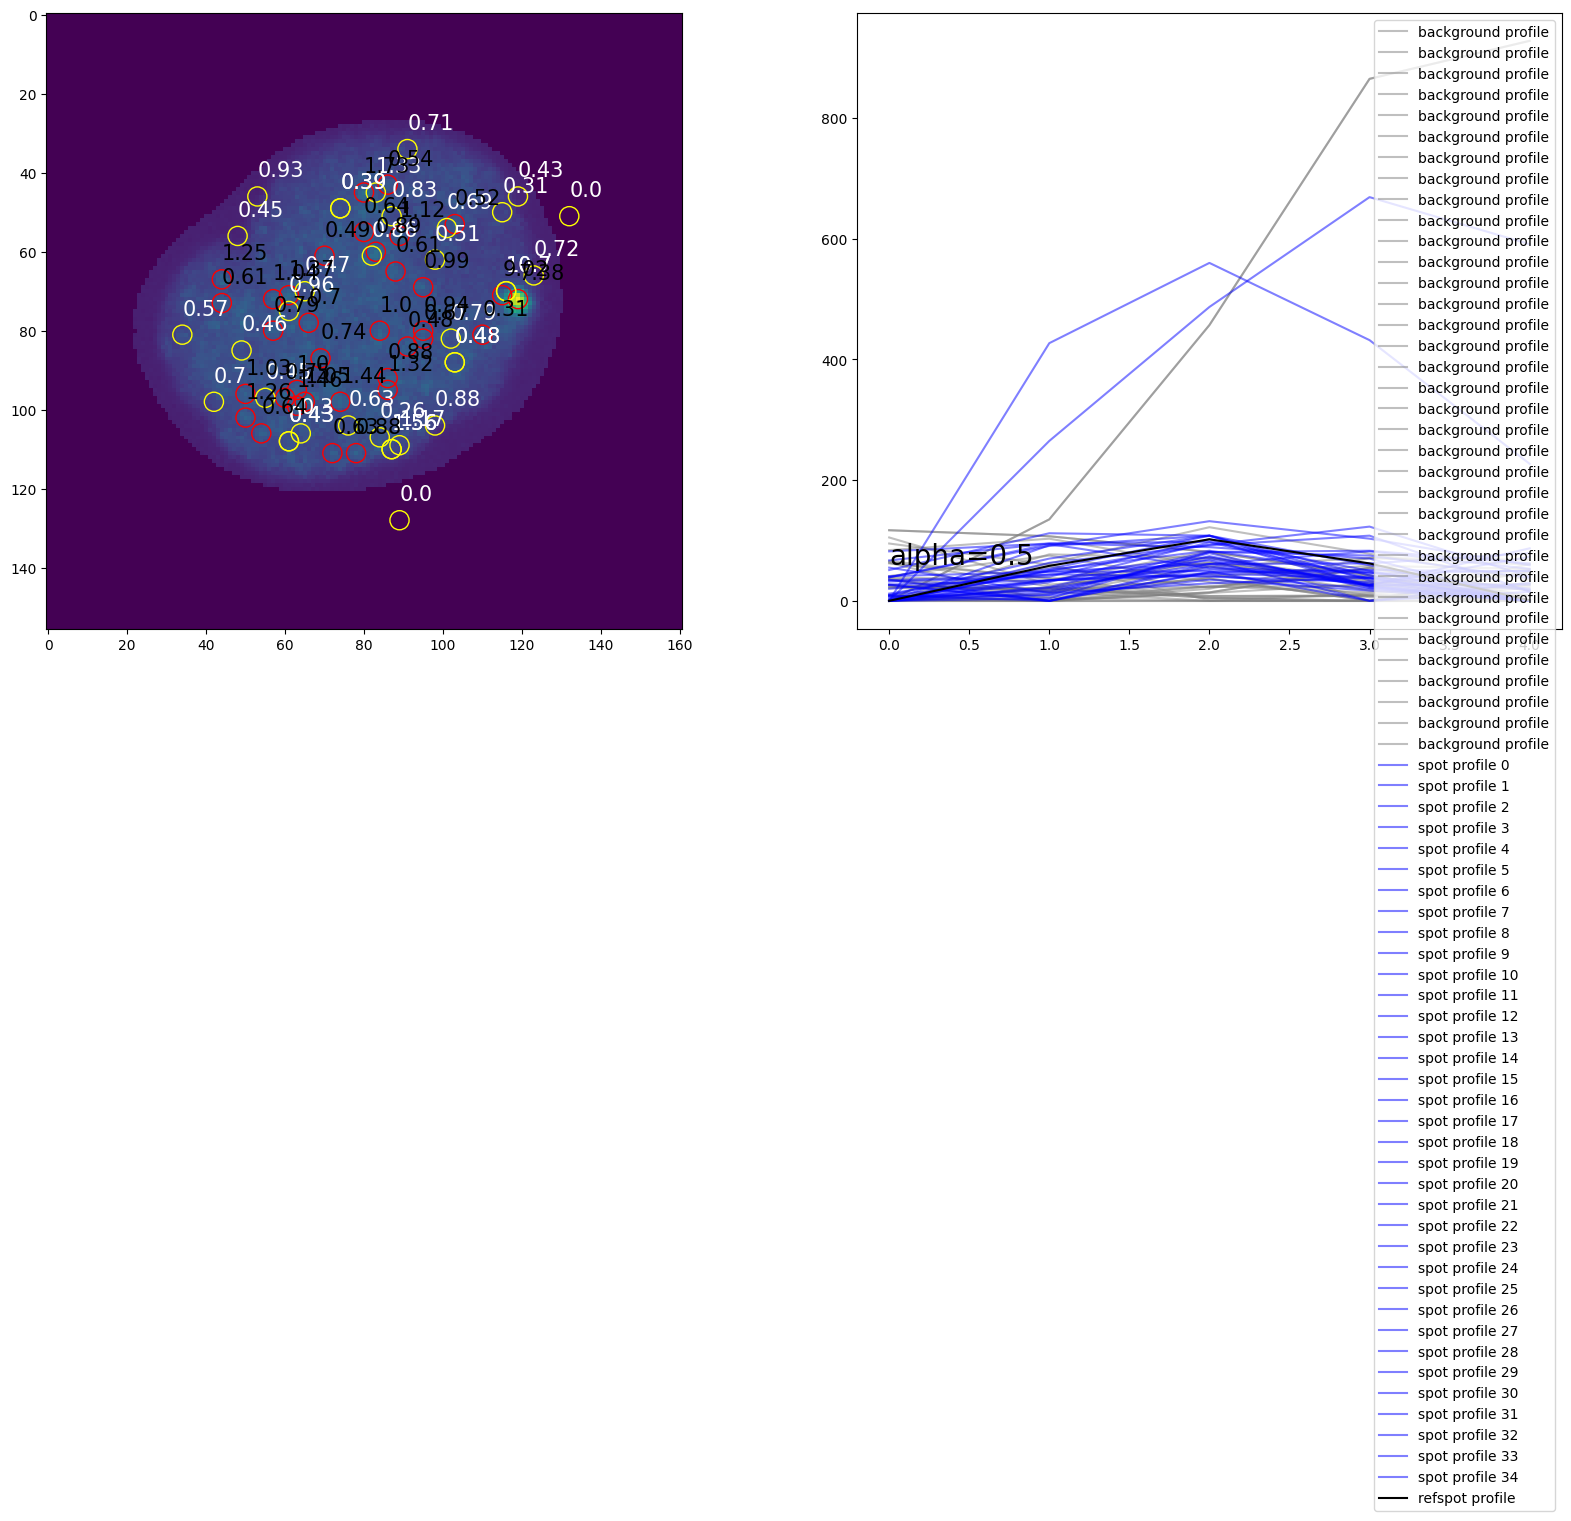

In [44]:
#Verify for a particular alpha
framn=4 #which frame to use for verification
referenceSpot_gamma = 15
referenceSpot_Alpha = 0.5

## Build reference spot
reference_spot, spots_found, max_intensity = buildReferenceSpotFromImages(images, spots_list, 
                                                                          alpha=referenceSpot_Alpha, 
                                                                          gamma=referenceSpot_gamma, 
                                                                          voxelSize=voxelRadius, 
                                                                          objectSize=objectRadius)

peaksref = np.max(np.max(reference_spot, axis=0), axis=1).astype(np.int64)-np.min(np.max(np.max(reference_spot, axis=0), axis=1))

plotBool = True

frameback = 11
framebacki = 0

if plotBool==True:   
    plt.figure(figsize=(20,8))
    ax1 = plt.subplot(1, 2, 1)
    ax1.imshow(mipSequenceCell[framn])
    ax1.scatter(spotsFrame[framn][:,2], spotsFrame[framn][:,1], marker='o', s=190, facecolors="None", edgecolors='red')
    ax2 = plt.subplot(1, 2, 2)
diffb = []

for jj in range(len(spotsFrame[framn])):
    frameback = random.sample(range(maxFrame),1)[0]
    while spotsFrame[frameback].size==0:
        frameback = random.sample(range(maxFrame),1)[0]
    spotBackground2D = getSpot2D(spotsFrame[frameback][framebacki], mipSequenceCell[framn], reference_spot)
    peaksb = np.max(spotBackground2D, axis=1)-np.min(np.max(spotBackground2D, axis=1))
    ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
    if plotBool==True:
        ax1.scatter(spotsFrame[frameback][framebacki:framebacki+1,2],spotsFrame[frameback][framebacki:framebacki+1,1],marker='o', s=190, facecolors="None", edgecolors='yellow')
        ax1.text(spotsFrame[frameback][framebacki,2],spotsFrame[frameback][framebacki,1]-5, np.round(np.mean(peaksb)/np.mean(peaksref),2), fontsize=15, color='white')
        ax2.plot(peaksb, color= 'grey', alpha=0.5, label='background profile')
    diffb.append(ddb)

diff = []

for jj in range(len(spotsFrame[framn])):
    spotTest2D = getSpot2D(spotsFrame[framn][jj], mipSequenceCell[framn], reference_spot)
    peaksy = np.max(spotTest2D, axis=1)-np.min(np.max(spotTest2D, axis=1)).astype(np.int64)
    dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)
    diff.append(dd)
    if plotBool==True: 
        ax2.plot(peaksy, color='blue', alpha=0.5, label='spot profile '+str(jj)) #str(jj)+'. '+
        ax1.text(spotsFrame[framn][jj,2],spotsFrame[framn][jj,1]-5, str(np.round(np.mean(peaksy)/np.mean(peaksref),2)), fontsize=15)
if plotBool==True:
    ax2.plot(peaksref, color='black',label='refspot profile')
    ax2.text(0, peaksref.max()*0.6, 'alpha='+str(referenceSpot_Alpha), fontsize=20)
    ax2.legend()

image list found!
Found 1568
Found 1568 spots, max intensity = 0
image list found!


/tmp/ipykernel_10911/1163628381.py:33: RuntimeWarning: divide by zero encountered in double_scalars
  ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
/tmp/ipykernel_10911/1163628381.py:33: RuntimeWarning: invalid value encountered in double_scalars
  ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
/tmp/ipykernel_10911/1163628381.py:40: RuntimeWarning: divide by zero encountered in double_scalars
  dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)
/home/raphael/miniconda3/envs/bigfishlive/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/raphael/miniconda3/envs/bigfishlive/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_10911/1163628381.py:40: RuntimeWarning: invalid value encountered in double_scalars
  dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)


Found 1568
Found 1568 spots, max intensity = 266
image list found!
Found 1568
Found 1568 spots, max intensity = 292
image list found!
Found 1568
Found 1568 spots, max intensity = 321
image list found!
Found 1568
Found 1568 spots, max intensity = 392


Text(0.5, 0, 'frames')

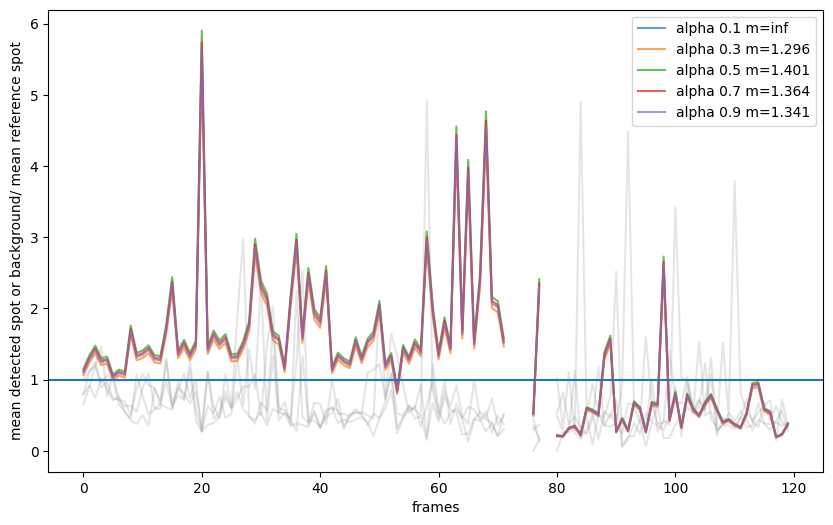

In [45]:
apoints = []
aback = []
for referenceSpot_Alpha in [0.1,0.3,0.5,0.7,0.9]:
    ## Build reference spot
    reference_spot, spots_found, max_intensity = buildReferenceSpotFromImages(images, spots_list, 
                                                                          alpha=referenceSpot_Alpha, 
                                                                          gamma=referenceSpot_gamma, 
                                                                          voxelSize=voxelRadius, 
                                                                          objectSize=objectRadius)

    peaksref = np.max(np.max(reference_spot, axis=0), axis=1).astype(np.int64)-np.min(np.max(np.max(reference_spot, axis=0), axis=1))

    aXp=[]
    aXb=[]
    plotBool = False
    for framn in range(0,maxFrame,1):
        frameback = 11
        framebacki = 0

        if plotBool==True:   
            plt.figure(figsize=(20,8))
            ax1 = plt.subplot(1, 2, 1)
            ax1.imshow(mipSequenceCell[framn])
            ax1.scatter(spotsFrame[framn][:,2], spotsFrame[framn][:,1], marker='o', s=190, facecolors="None", edgecolors='red')
            ax2 = plt.subplot(1, 2, 2)
        diffb = []
        for jj in range(len(spotsFrame[framn])):
            frameback = random.sample(range(maxFrame),1)[0]
            while spotsFrame[frameback].size==0:
                frameback = random.sample(range(maxFrame),1)[0]
            spotBackground2D = getSpot2D(spotsFrame[frameback][framebacki], mipSequenceCell[framn], reference_spot)
            peaksb = np.max(spotBackground2D, axis=1)-np.min(np.max(spotBackground2D, axis=1))
            ddb = np.round(np.mean(peaksb)/np.mean(peaksref),2)
            diffb.append(ddb)

        diff = []
        for jj in range(len(spotsFrame[framn])):
            spotTest2D = getSpot2D(spotsFrame[framn][jj], mipSequenceCell[framn], reference_spot)
            peaksy = np.max(spotTest2D, axis=1)-np.min(np.max(spotTest2D, axis=1)).astype(np.int64)
            dd = np.round(np.mean(peaksy)/np.mean(peaksref),2)
            diff.append(dd)

        aXb.append(np.mean(diffb))
        aXp.append(np.mean(diff))

    apoints.append(deepcopy(np.array(aXp)))
    aback.append(deepcopy(np.array(aXb)))
    
# Plot results    
plt.figure(figsize=(10,6))
i=0
for referenceSpot_Alpha in [0.1,0.3,0.5,0.7,0.9]:
    plt.plot(apoints[i], label='alpha '+str(referenceSpot_Alpha)+' m='+str(np.round(np.nanmean(apoints[i]),3)), alpha=0.7)
    plt.plot(aback[i], color='grey', alpha=0.2)
    i+=1

plt.axhline(1)
plt.legend()
plt.ylabel('mean detected spot or background/ mean reference spot')
plt.xlabel('frames')

In [ ]:
import session_info
session_info.show()